In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [14]:
df=pd.read_csv(r"C:\Users\my pc\Desktop\Machine Learning Projects\breast.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


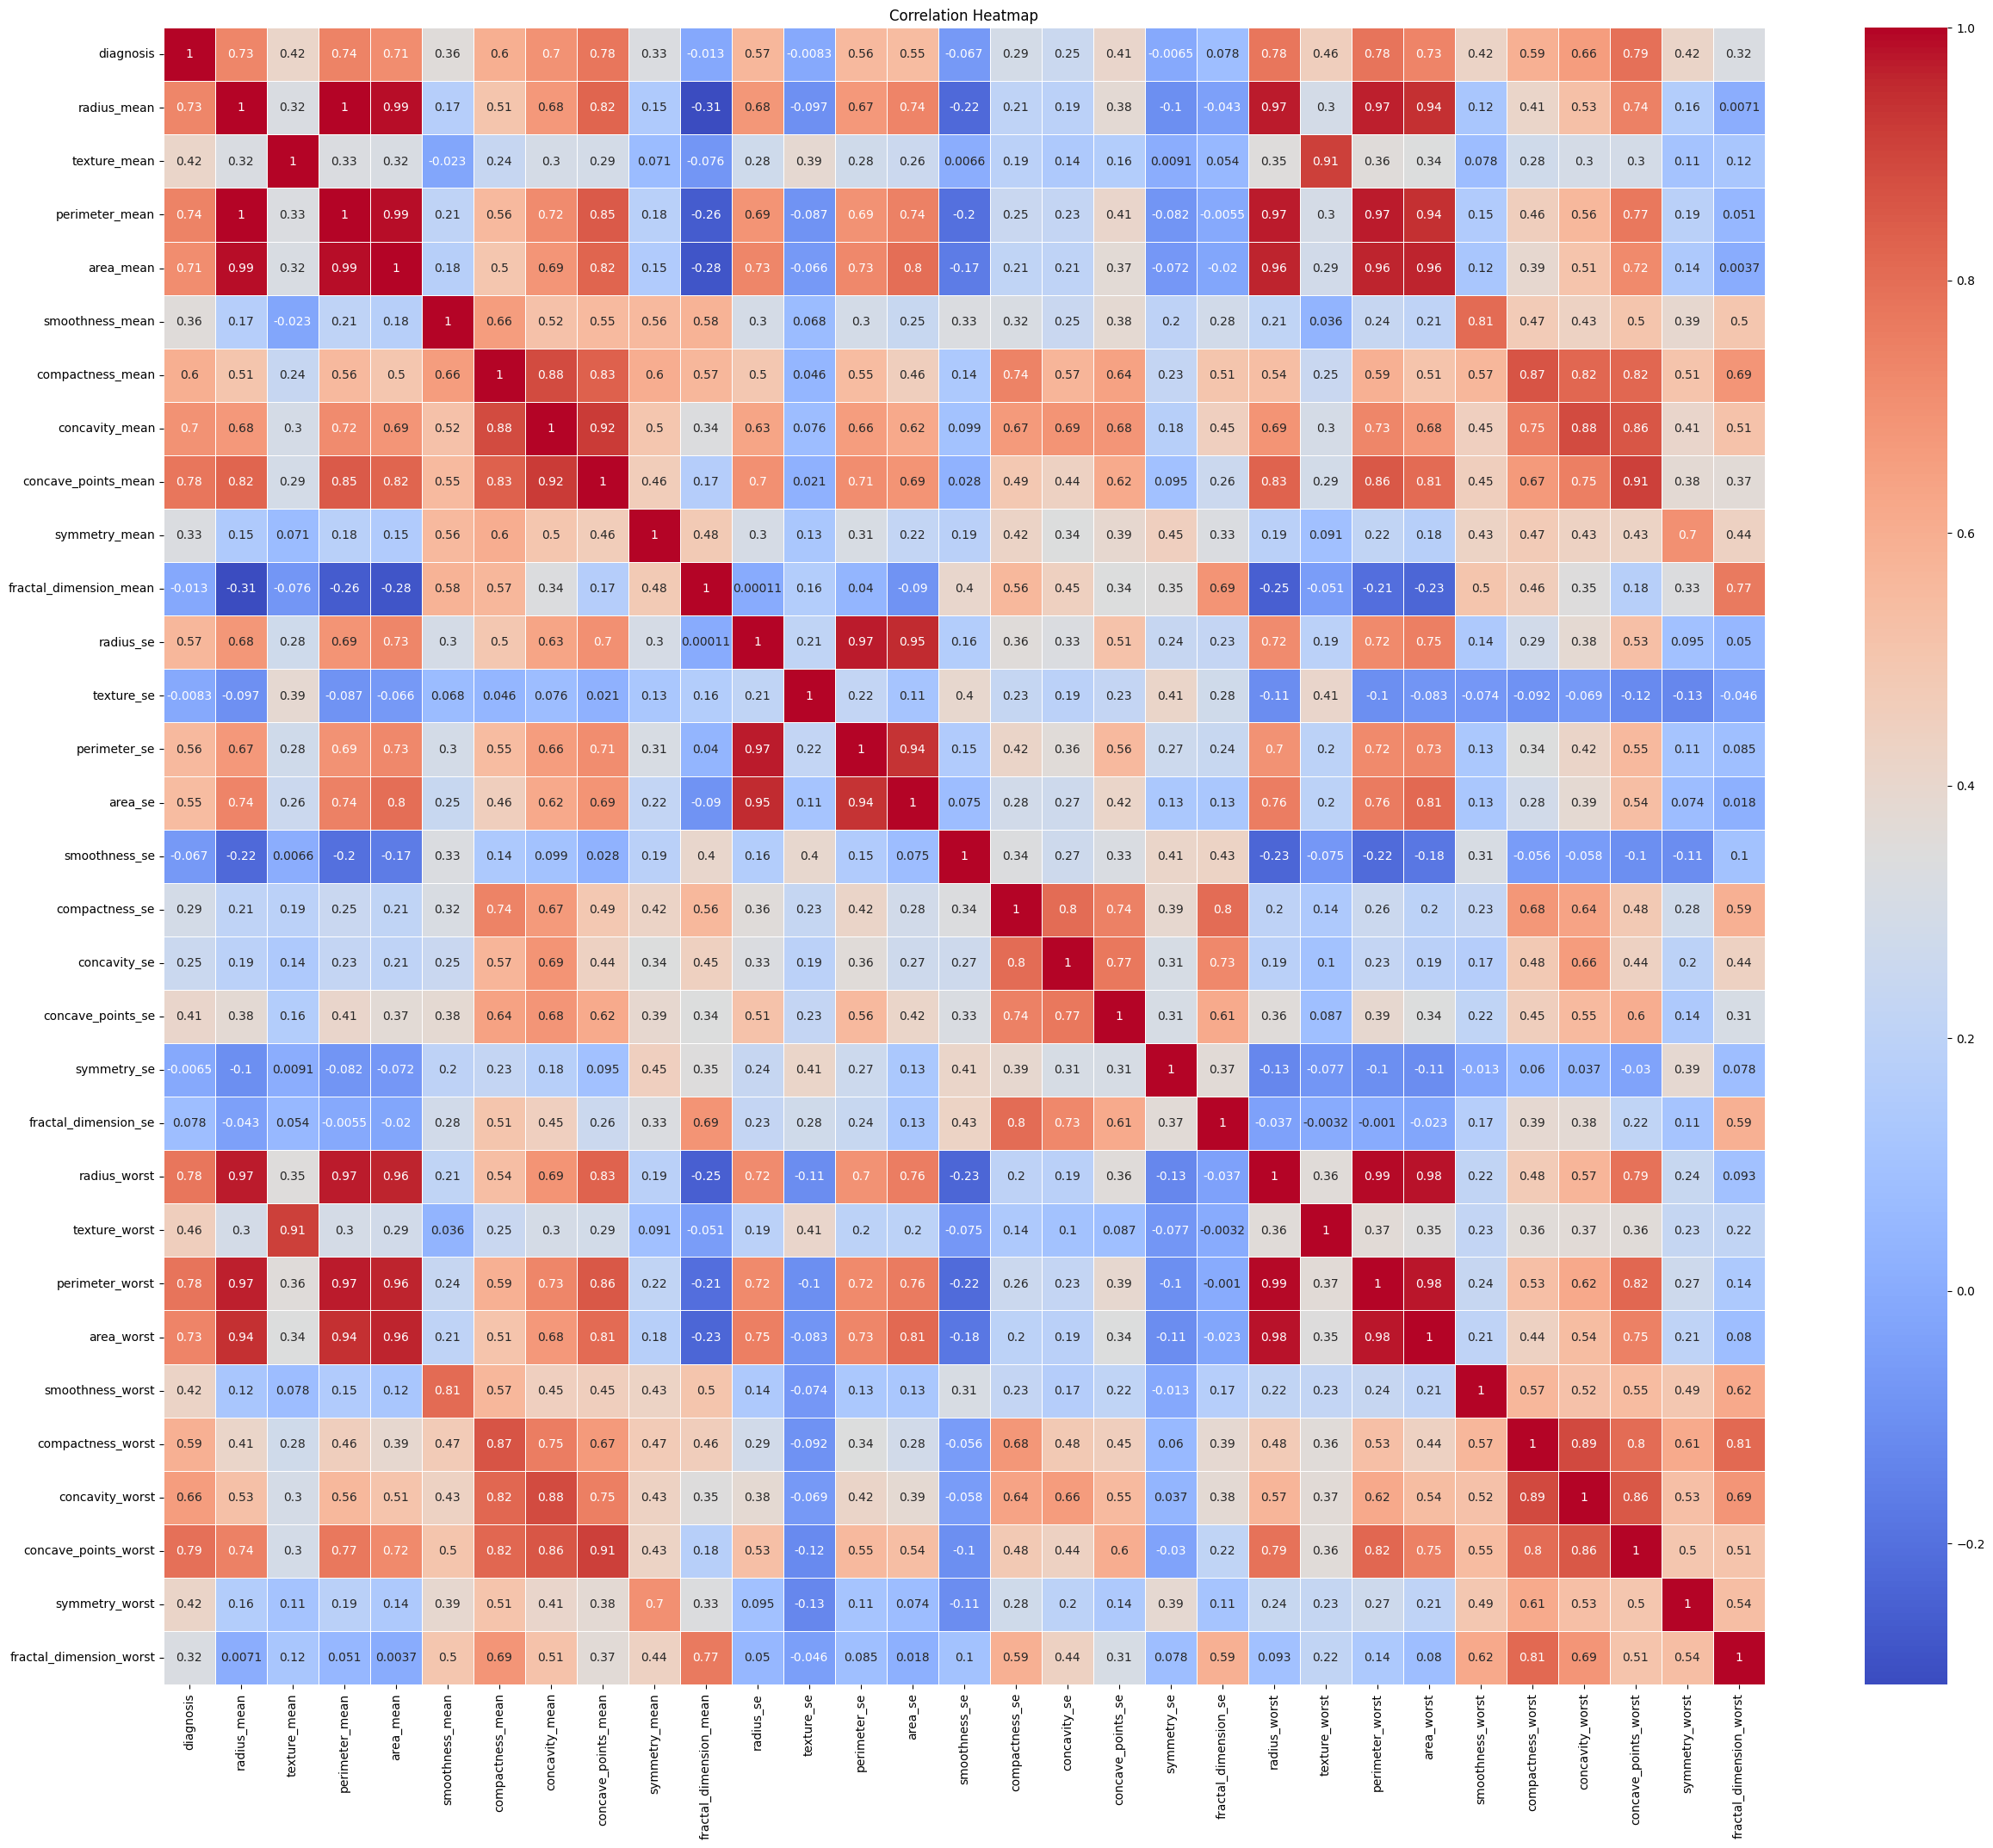

In [74]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 25))  # Set the size of the heatmap

# Create the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Set the title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

In [24]:
columns_to_drop=['id']
df=df.drop(columns_to_drop,axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [40]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Print the DataFrame
print(df)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1     0.521037      0.022658        0.545989   0.363733   
1            1     0.643144      0.272574        0.615783   0.501591   
2            1     0.601496      0.390260        0.595743   0.449417   
3            1     0.210090      0.360839        0.233501   0.102906   
4            1     0.629893      0.156578        0.630986   0.489290   
..         ...          ...           ...             ...        ...   
564          1     0.690000      0.428813        0.678668   0.566490   
565          1     0.622320      0.626987        0.604036   0.474019   
566          1     0.455251      0.621238        0.445788   0.303118   
567          1     0.644564      0.663510        0.665538   0.475716   
568          0     0.036869      0.501522        0.028540   0.015907   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010  

In [41]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

In [42]:
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,0.210090,0.360839,0.233501,0.102906,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.678668,0.566490,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,0.622320,0.626987,0.604036,0.474019,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,0.455251,0.621238,0.445788,0.303118,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,0.644564,0.663510,0.665538,0.475716,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [43]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([ 1.048937  ,  0.97520773,  0.65212518,  0.29423794,  0.09343894,
        0.10006593,  0.19973053,  0.44958704,  0.27751373,  0.87931941,
       -0.12538705,  0.48324002,  0.86530571, -0.16299901,  0.31951244,
        0.97151642, -0.10652473, -0.0684631 ,  1.63728005,  1.20548206,
        0.96214281,  0.37765513,  0.55039866,  1.1624623 ,  0.08780031,
       -0.11496515,  0.06428027,  1.0988015 ,  0.34155841,  0.06783008,
       -0.07003187,  0.40458124,  0.99105666,  0.18525918,  0.6416491 ,
        0.07050912,  0.62978474,  0.31056298,  0.76731717, -0.27106065,
        0.43145501,  0.99434396,  0.87189913,  0.31094288,  0.22525155,
       -0.15855369,  0.16411894,  0.32251235,  0.19795719,  0.77705209,
        0.09044588, -0.11163859,  1.0799059 , -0.11244603,  1.09064449,
        0.07991182, -0.15026189,  0.06824725,  0.7979504 ,  0.01773054,
        0.26966917,  0.30396054,  0.25613717,  1.08181392, -0.03078998,
        0.64781733,  0.04076492,  0.17856687,  0.95311892,  0.82

In [79]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

ValueError: Found input variables with inconsistent numbers of samples: [114, 569]

In [50]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0.210090,0.360839,0.233501,0.102906,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0.622320,0.626987,0.604036,0.474019,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0.455251,0.621238,0.445788,0.303118,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0.644564,0.663510,0.665538,0.475716,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [51]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

C:\Users\my pc\anaconda3\envs\tf2.7\lib\site-packages\matplotlib\collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


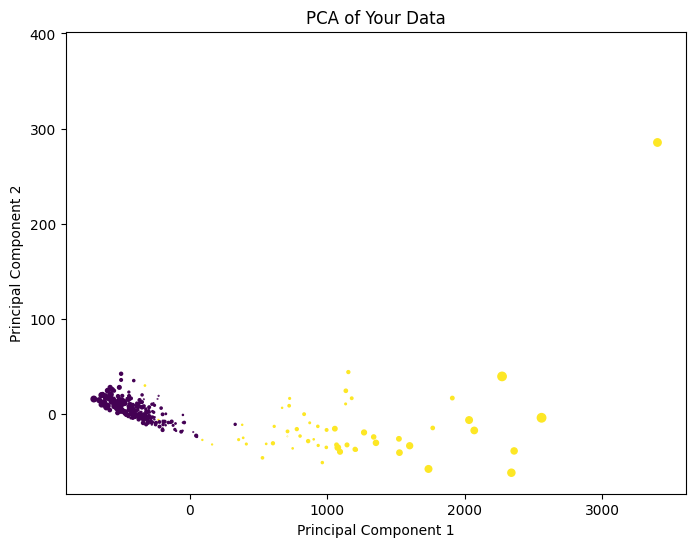

In [64]:
from sklearn.decomposition import PCA
n_components = 3
pca = PCA(n_components=n_components)

principal_components = pca.fit_transform(df)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3'])
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'],principal_df['PC3'],c=df['diagnosis'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Your Data')
plt.show()

In [65]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.97585129e-01 2.16972174e-03 1.46170792e-04]


In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
k_best = SelectKBest(score_func=chi2, k=10)  
X_new = k_best.fit_transform(X, y)
selected_indices = k_best.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]
X_selected = X[selected_feature_names]

In [84]:
X_selected

,perimeter_mean,area_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst
0,0.545989,0.363733,1.0950,8.589,153.40,25.380,17.33,184.60,2019.0,0.7119
1,0.615783,0.501591,0.5435,3.398,74.08,24.990,23.41,158.80,1956.0,0.2416
2,0.595743,0.449417,0.7456,4.585,94.03,23.570,25.53,152.50,1709.0,0.4504
3,0.233501,0.102906,0.4956,3.445,27.23,14.910,26.50,98.87,567.7,0.6869
4,0.630986,0.489290,0.7572,5.438,94.44,22.540,16.67,152.20,1575.0,0.4000
...,...,...,...,...,...,...,...,...,...,...
564,0.678668,0.566490,1.1760,7.673,158.70,25.450,26.40,166.10,2027.0,0.4107
565,0.604036,0.474019,0.7655,5.203,99.04,23.690,38.25,155.00,1731.0,0.3215
566,0.445788,0.303118,0.4564,3.425,48.55,18.980,34.12,126.70,1124.0,0.3403
567,0.665538,0.475716,0.7260,5.772,86.22,25.740,39.42,184.60,1821.0,0.9387


In [85]:
X_selected = pd.concat([X_selected, df['diagnosis']], axis=1)
X_selected

,perimeter_mean,area_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst,diagnosis
0,0.545989,0.363733,1.0950,8.589,153.40,25.380,17.33,184.60,2019.0,0.7119,1
1,0.615783,0.501591,0.5435,3.398,74.08,24.990,23.41,158.80,1956.0,0.2416,1
2,0.595743,0.449417,0.7456,4.585,94.03,23.570,25.53,152.50,1709.0,0.4504,1
3,0.233501,0.102906,0.4956,3.445,27.23,14.910,26.50,98.87,567.7,0.6869,1
4,0.630986,0.489290,0.7572,5.438,94.44,22.540,16.67,152.20,1575.0,0.4000,1
...,...,...,...,...,...,...,...,...,...,...,...
564,0.678668,0.566490,1.1760,7.673,158.70,25.450,26.40,166.10,2027.0,0.4107,1
565,0.604036,0.474019,0.7655,5.203,99.04,23.690,38.25,155.00,1731.0,0.3215,1
566,0.445788,0.303118,0.4564,3.425,48.55,18.980,34.12,126.70,1124.0,0.3403,1
567,0.665538,0.475716,0.7260,5.772,86.22,25.740,39.42,184.60,1821.0,0.9387,1


In [87]:
X_selected=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([ 0.65949558,  0.78871986,  0.32072006,  1.33518181,  0.73832527,
       -0.23711246,  0.19016734,  0.38337558, -0.10255275, -0.21910715,
        0.1094752 ,  0.13948526,  1.32504679,  0.63684291,  0.24153903,
        0.86768179,  0.04683706,  0.2950926 ,  0.02154409,  0.52351132,
        0.12180276,  0.5458983 ,  0.07465743,  0.36832015,  0.45124101,
        0.17667756,  0.09315366,  1.09203521,  0.03210952,  0.16535118,
       -0.00166   ,  0.78152258,  0.06291813,  0.38809427,  0.12619556,
        1.19730061,  0.7203077 ,  0.03473473,  1.13717312, -0.02351503,
        0.85102212,  0.83511614,  0.00536781,  0.16428679,  0.1514239 ,
        0.73010923,  0.2156906 ,  0.98359349, -0.18924372,  0.0281748 ,
       -0.30830862,  0.58875768,  0.79620239,  0.38301281,  0.24721717,
        1.18858201,  0.05021982,  0.74576541,  0.249468  ,  1.29068653,
        0.25172261, -0.15055303,  1.40372583,  0.31258274, -0.06248996,
        1.13566385,  0.85610524,  0.450231  ,  0.07753206,  0.00

In [88]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.056531501934920486
